In [1]:
#Installing required library
! pip install missingno
! pip install category_encoders 


In [2]:
# importing the packages
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno

# Feature Engineering


from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
import category_encoders as ce

# Model Selection
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier


from sklearn.metrics import classification_report, confusion_matrix
from imblearn.metrics import classification_report_imbalanced

from sklearn.model_selection import train_test_split
import lightgbm as lgb
classification_report_imbalanced

# Imbalance Dataset

from imblearn.over_sampling import RandomOverSampler

# Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")



In [3]:
# loading data frame
data_train = pd.read_csv("../data/fraudTrain.csv")
data_test = pd.read_csv("../data/fraudTest.csv")

In [4]:
# Printing info 
data_train.info()
print(data_train.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [5]:
# Taking a fraction of data to run models faster 10 % of training data and 5 % of test data
df_train= data_train.sample(frac = 0.1,random_state=1)
df_test= data_test.sample(frac = 0.05,random_state=1)
print(df_train.shape,df_test.shape)

(129668, 23) (27786, 23)


In [6]:
#displaying df_train
df_train.head(12)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
94102,94102,2019-02-25 08:24:40,374497717543058,fraud_Funk Group,grocery_net,20.00,Linda,Hurst,F,31701 Tucker Square Suite 893,...,47.1709,-100.7944,1190,"Designer, ceramics/pottery",1948-06-30,1595dec12f6f19ceaae9b7df0f8af5c0,1330158280,46.398331,-99.813959,0
198791,198791,2019-04-12 19:50:15,4428154703770710,"fraud_Prosacco, Kreiger and Kovacek",home,284.88,Brittany,Guerra,F,79209 Gary Dale,...,46.5901,-117.1692,761,Chief Marketing Officer,1943-06-30,0ed26b649ed0fce94d8e632b7208dea0,1334260215,45.687331,-117.488135,0
1238587,1238587,2020-05-31 21:50:53,213148039875802,"fraud_Langworth, Boehm and Gulgowski",shopping_net,5.07,Jill,Jacobs,F,034 Kimberly Mountains,...,27.9551,-82.2966,79613,Environmental consultant,1978-11-30,7096316ec1a4b261e8613013827abae7,1370037053,27.254081,-81.974799,0
619078,619078,2019-09-20 17:06:52,2283743876903625,fraud_Conroy-Emard,food_dining,45.38,Shannon,Williams,F,9345 Spencer Junctions Suite 183,...,34.0770,-84.3033,165556,Prison officer,1997-12-27,d02c35d7bda19c3da84b6d01f02da7e8,1348160812,34.551957,-83.374265,0
573850,573850,2019-08-31 23:22:50,4798937978667559470,fraud_Adams-Barrows,health_fitness,27.52,Robert,Williams,M,09419 Lewis Rapids,...,43.6088,-83.9530,67858,Water quality scientist,1995-03-13,dccf059d9fdc15f1fb9d2abb50e7314b,1346455370,43.032957,-83.521294,0
1201872,1201872,2020-05-17 18:21:17,6538891242532018,fraud_Effertz LLC,entertainment,131.75,Jodi,Rodriguez,F,5796 Lee Coves Apt. 286,...,36.0244,-90.9288,7155,"Engineer, control and instrumentation",1977-03-23,4e700b0737fbfe948c3af0af594a964e,1368814877,35.068173,-90.274482,0
61984,61984,2019-02-05 21:47:54,4998109455173950,fraud_Morissette LLC,entertainment,146.69,Mary,Pruitt,F,2819 Luke Greens Suite 563,...,38.9621,-94.5959,545147,Counsellor,1987-11-18,dd7ea05d67a0ff509e3d0fb1fdfe7f38,1328478474,38.229734,-94.197224,0
552029,552029,2019-08-24 11:59:19,60422928733,fraud_Wiegand-Lowe,grocery_net,74.27,Jeffrey,Powers,M,38352 Parrish Road Apt. 652,...,33.6028,-81.9748,46944,Secondary school teacher,1942-04-02,214d540bdca14cdeb5eb347784d44f0c,1345809559,34.230048,-82.674878,0
1079425,1079425,2020-03-24 06:07:24,377264520876399,fraud_Harris Group,food_dining,11.22,Kara,Miles,F,2076 Thomas Roads Suite 970,...,34.3424,-80.5000,4424,Lawyer,1961-07-31,e7370494e1d3171f0ce1a5bdbae071f4,1364105244,33.700800,-80.342778,0
681734,681734,2019-10-18 03:41:04,4070511711385545,fraud_Dach-Nader,misc_net,3.96,Stephanie,Hopkins,F,44089 Carrie Crossing Suite 954,...,28.9814,-98.0156,2435,"Engineer, mining",1967-04-09,e2f08d1f890af7c6f4d3dfb6cc90a18a,1350531664,29.905143,-98.185725,0


In [7]:
# creating dataframe by looping through the columns of df_train and use built in function to show data type, nullvalue, nullpct, unique value and unique sample and display it as a data frame for better visual
listItem = []
for col in df_train.columns :
    listItem.append([col, df_train[col].dtype, 
                     df_train[col].isna().sum(), 
                     round((df_train[col].isna().sum()/len(df_train[col])) * 100,2),
                    df_train[col].nunique(), list(df_train[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,Unnamed: 0,int64,0,0.0,129668,"[1199239, 1029473]"
1,trans_date_trans_time,object,0,0.0,129442,"[2019-12-21 07:16:16, 2019-07-03 11:24:31]"
2,cc_num,int64,0,0.0,951,"[580954173374, 374238209524200]"
3,merchant,object,0,0.0,693,"[fraud_Thompson-Gleason, fraud_Christiansen-Gu..."
4,category,object,0,0.0,14,"[personal_care, travel]"
5,amt,float64,0,0.0,22908,"[211.65, 126.8]"
6,first,object,0,0.0,345,"[Monique, Renee]"
7,last,object,0,0.0,475,"[Skinner, Brown]"
8,gender,object,0,0.0,2,"[M, F]"
9,street,object,0,0.0,951,"[8957 Russell Key, 5069 Scott Pass Apt. 654]"


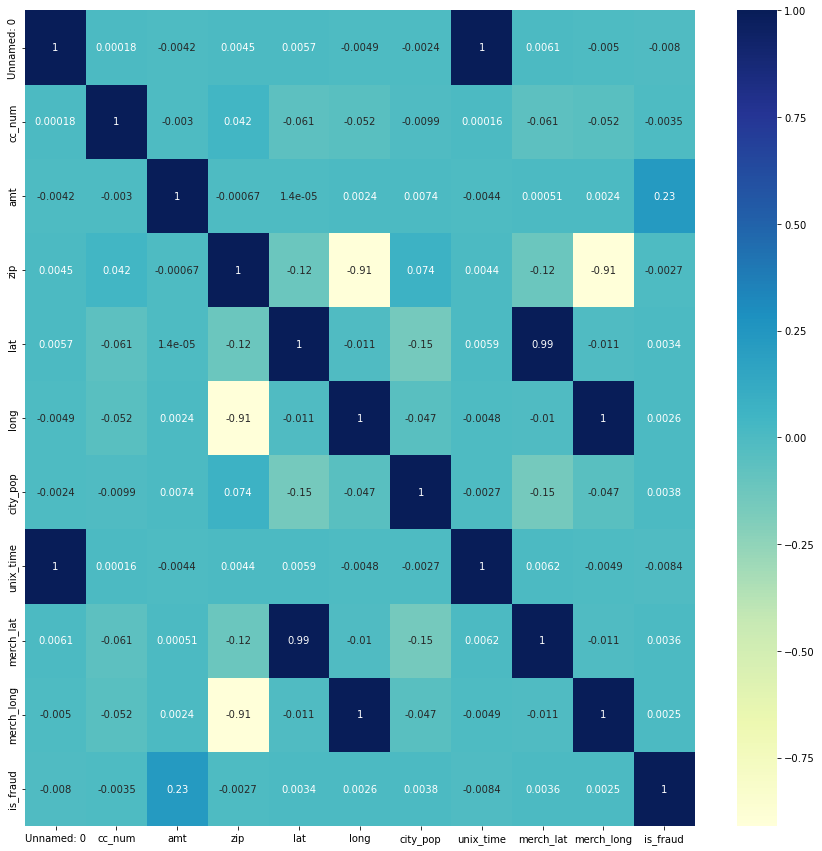

In [8]:
#showing correlation based on dataframe columns
corrmat = df_train.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(15,15))

#plot heat map
g=sns.heatmap(df_train[top_corr_features].corr(),annot=True,cmap="YlGnBu")

The columns we will drop:

1. "Unnamed" because it only contains indexes and is not useful to our machine learning.
2. Second we will dropped "trans_date_trans_time" since we have unix_time 
3. The third column customer card number .
4. we will dropped "first name" and "last name" dropped.
5. Transaction number we also think it won't be really needed.


In [9]:
# Dropping unnesecarry coloumns based on hypothesis and correlation matrix
df_train.drop(['trans_date_trans_time','Unnamed: 0','cc_num','first','last','trans_num'],axis=1, inplace=True)

In [10]:
# printing data frame to check output after the coloumns been dropped
df_train.head(10)

,merchant,category,amt,gender,street,city,state,zip,lat,long,city_pop,job,dob,unix_time,merch_lat,merch_long,is_fraud
94102,fraud_Funk Group,grocery_net,20.00,F,31701 Tucker Square Suite 893,Wilton,ND,58579,47.1709,-100.7944,1190,"Designer, ceramics/pottery",1948-06-30,1330158280,46.398331,-99.813959,0
198791,"fraud_Prosacco, Kreiger and Kovacek",home,284.88,F,79209 Gary Dale,Colton,WA,99113,46.5901,-117.1692,761,Chief Marketing Officer,1943-06-30,1334260215,45.687331,-117.488135,0
1238587,"fraud_Langworth, Boehm and Gulgowski",shopping_net,5.07,F,034 Kimberly Mountains,Brandon,FL,33510,27.9551,-82.2966,79613,Environmental consultant,1978-11-30,1370037053,27.254081,-81.974799,0
619078,fraud_Conroy-Emard,food_dining,45.38,F,9345 Spencer Junctions Suite 183,Alpharetta,GA,30009,34.0770,-84.3033,165556,Prison officer,1997-12-27,1348160812,34.551957,-83.374265,0
573850,fraud_Adams-Barrows,health_fitness,27.52,M,09419 Lewis Rapids,Bay City,MI,48706,43.6088,-83.9530,67858,Water quality scientist,1995-03-13,1346455370,43.032957,-83.521294,0
1201872,fraud_Effertz LLC,entertainment,131.75,F,5796 Lee Coves Apt. 286,Walnut Ridge,AR,72476,36.0244,-90.9288,7155,"Engineer, control and instrumentation",1977-03-23,1368814877,35.068173,-90.274482,0
61984,fraud_Morissette LLC,entertainment,146.69,F,2819 Luke Greens Suite 563,Kansas City,MO,64114,38.9621,-94.5959,545147,Counsellor,1987-11-18,1328478474,38.229734,-94.197224,0
552029,fraud_Wiegand-Lowe,grocery_net,74.27,M,38352 Parrish Road Apt. 652,North Augusta,SC,29860,33.6028,-81.9748,46944,Secondary school teacher,1942-04-02,1345809559,34.230048,-82.674878,0
1079425,fraud_Harris Group,food_dining,11.22,F,2076 Thomas Roads Suite 970,Cassatt,SC,29032,34.3424,-80.5000,4424,Lawyer,1961-07-31,1364105244,33.700800,-80.342778,0
681734,fraud_Dach-Nader,misc_net,3.96,F,44089 Carrie Crossing Suite 954,Falls City,TX,78113,28.9814,-98.0156,2435,"Engineer, mining",1967-04-09,1350531664,29.905143,-98.185725,0


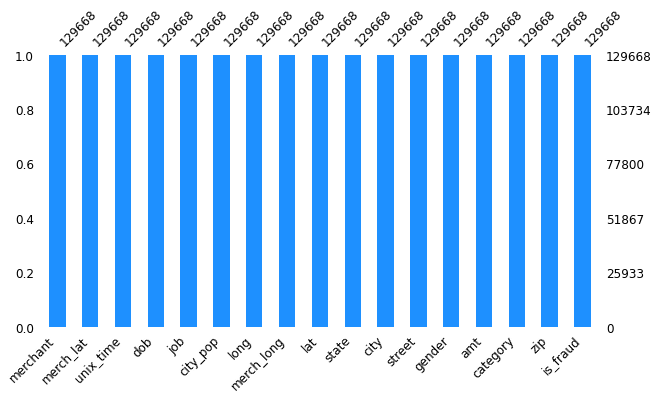

In [11]:
# To visual current coloums doesn't have missing value 
missingno.bar(df_train,color="dodgerblue", sort="ascending", figsize=(10,5), fontsize=12);

In [12]:
# creating dataframe by looping through the columns of df_test and use built in function to show data type, nullvalue, nullpct, unique value and unique sample and display it as a data frame for better visual

listItem = []
for col in df_test.columns :
    listItem.append([col, df_test[col].dtype, 
                     df_test[col].isna().sum(), 
                     round((df_test[col].isna().sum()/len(df_test[col])) * 100,2),
                    df_test[col].nunique(), list(df_test[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,Unnamed: 0,int64,0,0.0,27786,"[470078, 104451]"
1,trans_date_trans_time,object,0,0.0,27767,"[2020-12-14 15:56:34, 2020-10-03 09:23:20]"
2,cc_num,int64,0,0.0,914,"[567868110212, 6011542681743618]"
3,merchant,object,0,0.0,693,"[fraud_Jones, Sawayn and Romaguera, fraud_Lehn..."
4,category,object,0,0.0,14,"[gas_transport, misc_pos]"
5,amt,float64,0,0.0,12346,"[168.44, 57.28]"
6,first,object,0,0.0,338,"[Francisco, Julie]"
7,last,object,0,0.0,468,"[Mason, Webster]"
8,gender,object,0,0.0,2,"[F, M]"
9,street,object,0,0.0,914,"[5901 Foster Pine, 53199 Laurie Mills Apt. 864]"


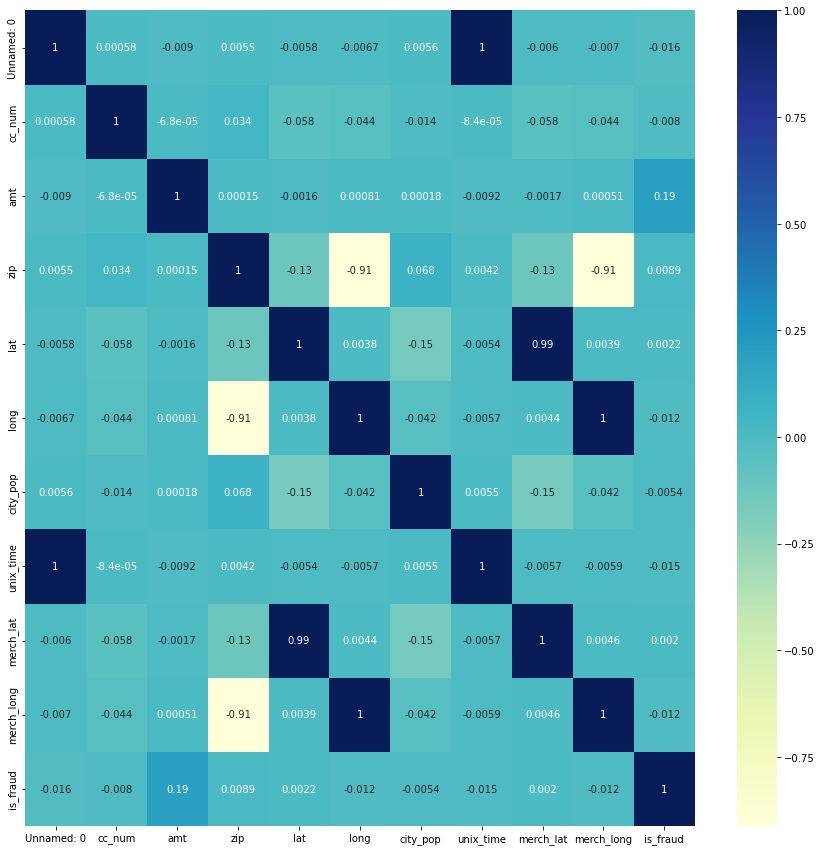

In [13]:
#showing correlation based on dataframe columns
corrmat = df_test.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(15,15))

#plot heat map
g=sns.heatmap(df_test[top_corr_features].corr(),annot=True,cmap="YlGnBu")

Same like train df

The columns we will drop:

1. "Unnamed" because it only contains indexes and is not useful to our machine learning.
2. Second we will dropped "trans_date_trans_time" since we have unix_time 
3. The third column customer card number .
4. we will dropped "first name" and "last name" dropped.
5. Transaction number we also think it won't be really needed since other collums .


In [14]:
# Dropping unnesecarry coloumns based on hypothesis and correlation matrix
df_test.drop(['trans_date_trans_time','Unnamed: 0','cc_num','first','last','trans_num'],axis=1, inplace=True)

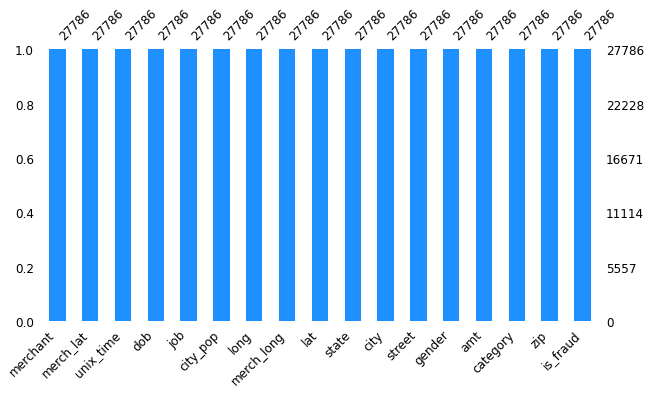

In [15]:
# To visual current coloums doesn't have missing value 
missingno.bar(df_test,color="dodgerblue", sort="ascending", figsize=(10,5), fontsize=12);

In [16]:
# printing data frame to check output after the coloumns been dropped
df_test.head(10)

,merchant,category,amt,gender,street,city,state,zip,lat,long,city_pop,job,dob,unix_time,merch_lat,merch_long,is_fraud
207181,fraud_Bernier and Sons,kids_pets,41.17,M,7838 Jason Squares,Elizabethtown,KY,42701,37.6848,-85.8784,48194,Surgeon,1990-05-03,1378054835,38.370429,-86.671765,0
501018,fraud_McCullough LLC,misc_pos,51.89,M,27718 Mason Bypass,Mount Saint Joseph,OH,45051,39.0965,-84.6431,177,Exhibition designer,1974-05-30,1387521110,39.090859,-84.115650,0
312515,fraud_Durgan-Auer,misc_net,2.22,F,0665 Lisa Alley,Winger,MN,56592,47.5375,-95.9941,516,Applications developer,1966-06-07,1382090733,47.285136,-96.180797,0
407433,fraud_Berge LLC,gas_transport,87.21,M,1198 Robert Stravenue Apt. 479,Armonk,NY,10504,41.1360,-73.7009,7987,Television/film/video producer,1964-03-16,1385702190,41.503596,-73.220229,0
386454,"fraud_Johnson, Runolfsdottir and Mayer",misc_net,79.78,F,6412 Elizabeth Gardens Suite 633,Maysville,KY,41056,38.6207,-83.8067,14228,Advertising account executive,1971-03-26,1384849723,39.043199,-83.842076,0
377036,fraud_Baumbach Ltd,personal_care,17.07,F,639 Cruz Islands,Baroda,MI,49101,41.9488,-86.4913,3104,"Horticulturist, commercial",1981-03-29,1384528601,41.247074,-86.394800,0
17021,fraud_Brown PLC,misc_net,6.12,F,474 Allen Haven,North Loup,NE,68859,41.4972,-98.7858,509,"Nurse, children's",1980-09-15,1372326121,41.457934,-99.433016,0
353139,"fraud_Mosciski, Ziemann and Farrell",shopping_net,39.28,F,65417 Walsh Radial Suite 691,Saint Amant,LA,70774,30.2385,-90.8435,10076,"Surveyor, rural practice",1977-12-16,1383567831,29.307781,-91.548423,0
110145,fraud_Rodriguez Group,gas_transport,74.77,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1375080039,48.311053,-117.511294,0
398113,"fraud_Hayes, Marquardt and Dibbert",misc_net,265.31,F,597 Jenny Ford Apt. 543,Tupper Lake,NY,12986,44.2320,-74.4905,6120,Chartered loss adjuster,1976-10-09,1385285951,44.836739,-73.972220,0


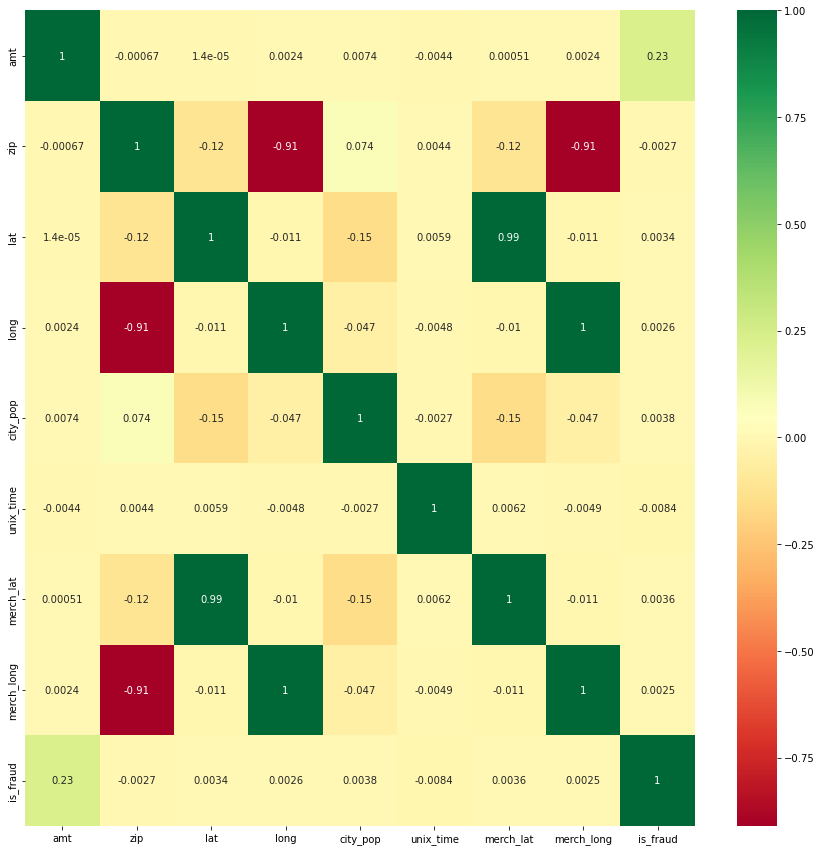

In [17]:
#showing correlation based on dataframe columns after few unesecarry columns being dropped
corrmat = df_train.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(15,15))

#plot heat map
g=sns.heatmap(df_train[top_corr_features].corr(),annot=True,cmap="RdYlGn")

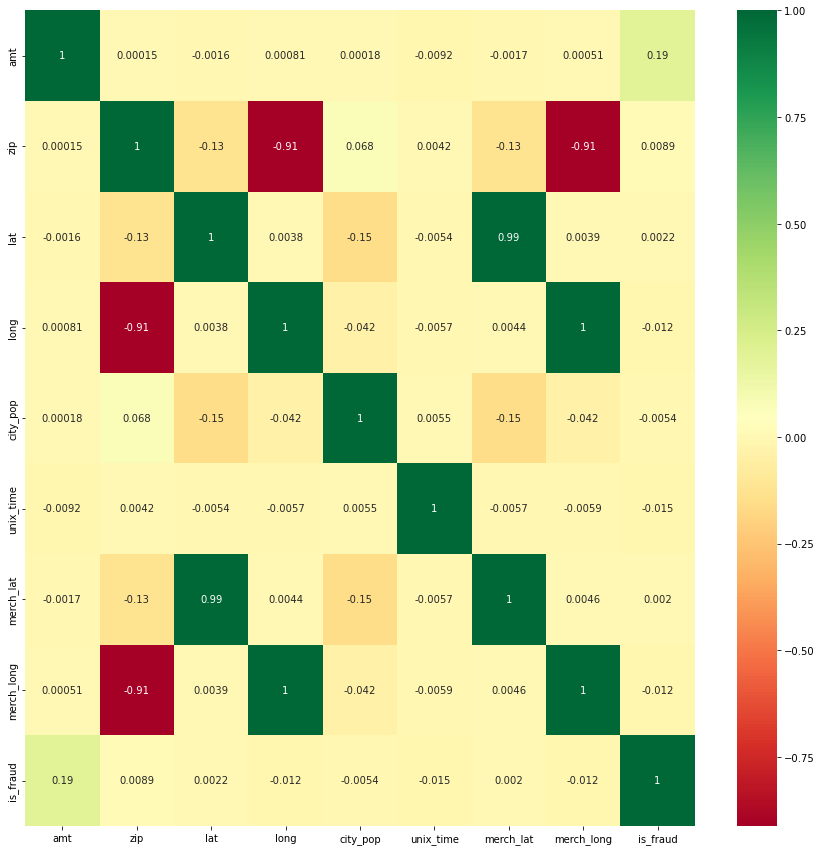

In [18]:
#showing correlation based on dataframe columns after few unesecarry columns being dropped
corrmat = df_test.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(15,15))

#plot heat map
g=sns.heatmap(df_test[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [19]:
## Get the Fraud and the normal transaction numbers for test and train dataset 

fraud_train = df_train[df_train['is_fraud']==1]
normal_train = df_train[df_train['is_fraud']==0]
fraud_test = df_test[df_test['is_fraud']==1]
normal_test = df_test[df_test['is_fraud']==0]

print("Normal cases in train set :",(len(df_train)-len(fraud_train))/len(df_train),"\nFraud cases in train set :",len(fraud_train)/len(df_train))
print("Normal cases in test set :",(len(df_test)-len(fraud_test))/len(df_test),"\nFraud cases in test set :",len(fraud_test)/len(df_test))

Normal cases in train set : 0.9945630379122066 
Fraud cases in train set : 0.005436962087793442
Normal cases in test set : 0.9953213848700785 
Fraud cases in test set : 0.004678615129921543


In [20]:
# function to convert dob to years
def age_years(born):
    return 2019 - int(born[0:4])

# replacing the dob column with age column in our data set for test and train
df_train['age'] = df_train['dob'].apply(lambda x: age_years(x))
df_train = df_train.drop(['dob'],axis =1)

df_test['age'] = df_test['dob'].apply(lambda x: age_years(x))
df_test = df_test.drop(['dob'],axis =1)
print(df_train.shape,df_test.shape)

(129668, 17) (27786, 17)


In [21]:
# concanating the test and train data so that number of columns remain the same in both the data sets
final_df = pd.concat([df_train,df_test],axis=0)
final_df.shape

(157454, 17)

In [22]:
#showing final_df output
final_df.head(10)

,merchant,category,amt,gender,street,city,state,zip,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud,age
94102,fraud_Funk Group,grocery_net,20.00,F,31701 Tucker Square Suite 893,Wilton,ND,58579,47.1709,-100.7944,1190,"Designer, ceramics/pottery",1330158280,46.398331,-99.813959,0,71
198791,"fraud_Prosacco, Kreiger and Kovacek",home,284.88,F,79209 Gary Dale,Colton,WA,99113,46.5901,-117.1692,761,Chief Marketing Officer,1334260215,45.687331,-117.488135,0,76
1238587,"fraud_Langworth, Boehm and Gulgowski",shopping_net,5.07,F,034 Kimberly Mountains,Brandon,FL,33510,27.9551,-82.2966,79613,Environmental consultant,1370037053,27.254081,-81.974799,0,41
619078,fraud_Conroy-Emard,food_dining,45.38,F,9345 Spencer Junctions Suite 183,Alpharetta,GA,30009,34.0770,-84.3033,165556,Prison officer,1348160812,34.551957,-83.374265,0,22
573850,fraud_Adams-Barrows,health_fitness,27.52,M,09419 Lewis Rapids,Bay City,MI,48706,43.6088,-83.9530,67858,Water quality scientist,1346455370,43.032957,-83.521294,0,24
1201872,fraud_Effertz LLC,entertainment,131.75,F,5796 Lee Coves Apt. 286,Walnut Ridge,AR,72476,36.0244,-90.9288,7155,"Engineer, control and instrumentation",1368814877,35.068173,-90.274482,0,42
61984,fraud_Morissette LLC,entertainment,146.69,F,2819 Luke Greens Suite 563,Kansas City,MO,64114,38.9621,-94.5959,545147,Counsellor,1328478474,38.229734,-94.197224,0,32
552029,fraud_Wiegand-Lowe,grocery_net,74.27,M,38352 Parrish Road Apt. 652,North Augusta,SC,29860,33.6028,-81.9748,46944,Secondary school teacher,1345809559,34.230048,-82.674878,0,77
1079425,fraud_Harris Group,food_dining,11.22,F,2076 Thomas Roads Suite 970,Cassatt,SC,29032,34.3424,-80.5000,4424,Lawyer,1364105244,33.700800,-80.342778,0,58
681734,fraud_Dach-Nader,misc_net,3.96,F,44089 Carrie Crossing Suite 954,Falls City,TX,78113,28.9814,-98.0156,2435,"Engineer, mining",1350531664,29.905143,-98.185725,0,52


In [23]:
# creating function to convert categorical variables to one hot encoding
def category_onehot_multcols(data,multcolumns):
    df_final = data
    i=0
    for fields in multcolumns:
        print(fields)
        df1=pd.get_dummies(final_df[fields],drop_first=True)
        final_df.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:           
            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1             
    df_final=pd.concat([final_df,df_final],axis=1)
    return df_final

In [24]:
# creating the list of categorical variables equal to object
categorical_features =[feature for feature in final_df.columns 
                       if final_df[feature].dtypes == 'O']
categorical_features

['merchant', 'category', 'gender', 'street', 'city', 'state', 'job']

In [25]:
# applying the one hot encoding
final_df = category_onehot_multcols(final_df, categorical_features)

merchant
category
gender
street
city
state
job


In [26]:
# removing duplicated columns
final_df =final_df.loc[:,~final_df.columns.duplicated()]
final_df.shape


(157454, 3078)

In [27]:
final_df.head(10)

,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,age,...,Video editor,Visual merchandiser,Volunteer coordinator,Warden/ranger,Waste management officer,Water engineer,Water quality scientist,Web designer,Wellsite geologist,Writer
94102,20.00,58579,47.1709,-100.7944,1190,1330158280,46.398331,-99.813959,0,71,...,0,0,0,0,0,0,0,0,0,0
198791,284.88,99113,46.5901,-117.1692,761,1334260215,45.687331,-117.488135,0,76,...,0,0,0,0,0,0,0,0,0,0
1238587,5.07,33510,27.9551,-82.2966,79613,1370037053,27.254081,-81.974799,0,41,...,0,0,0,0,0,0,0,0,0,0
619078,45.38,30009,34.0770,-84.3033,165556,1348160812,34.551957,-83.374265,0,22,...,0,0,0,0,0,0,0,0,0,0
573850,27.52,48706,43.6088,-83.9530,67858,1346455370,43.032957,-83.521294,0,24,...,0,0,0,0,0,0,1,0,0,0
1201872,131.75,72476,36.0244,-90.9288,7155,1368814877,35.068173,-90.274482,0,42,...,0,0,0,0,0,0,0,0,0,0
61984,146.69,64114,38.9621,-94.5959,545147,1328478474,38.229734,-94.197224,0,32,...,0,0,0,0,0,0,0,0,0,0
552029,74.27,29860,33.6028,-81.9748,46944,1345809559,34.230048,-82.674878,0,77,...,0,0,0,0,0,0,0,0,0,0
1079425,11.22,29032,34.3424,-80.5000,4424,1364105244,33.700800,-80.342778,0,58,...,0,0,0,0,0,0,0,0,0,0
681734,3.96,78113,28.9814,-98.0156,2435,1350531664,29.905143,-98.185725,0,52,...,0,0,0,0,0,0,0,0,0,0


In [28]:
# Splitting the dataframe into test and train
X = final_df.drop(columns=['is_fraud'])
y = final_df['is_fraud']

X_train,X_test,y_train,y_test= train_test_split(X,y,stratify=y,test_size=0.2,random_state=2021)

In [29]:
# checking the features of train data set after encoded data
X_train.head(10)

,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,age,fraud_Abbott-Steuber,...,Video editor,Visual merchandiser,Volunteer coordinator,Warden/ranger,Waste management officer,Water engineer,Water quality scientist,Web designer,Wellsite geologist,Writer
312940,59.94,78584,26.4215,-99.0025,18128,1338477626,25.629671,-98.452198,29,0,...,0,0,0,0,0,0,0,0,0,0
496641,6.12,95148,37.3304,-121.7913,973849,1344087820,37.566084,-120.945339,22,0,...,0,0,0,0,0,0,0,0,0,0
357245,73.25,32780,28.5697,-80.8191,54767,1339818138,27.977247,-80.236708,32,0,...,0,0,0,0,0,0,0,0,0,0
1186712,85.01,46254,39.8490,-86.2720,910148,1368232226,40.748611,-85.390997,44,0,...,0,0,0,0,0,0,0,0,0,0
18337,19.40,71277,32.9550,-92.5870,1758,1372368155,32.714465,-92.793694,62,0,...,0,0,0,0,0,0,0,0,0,0
841328,3.00,78248,29.5894,-98.5201,1595797,1355439227,28.749310,-97.745267,44,0,...,0,0,0,0,0,0,0,0,0,0
414655,86.35,85086,33.8155,-112.1202,1312922,1385839858,34.524096,-111.770643,20,0,...,0,0,0,0,0,0,0,0,0,0
1054977,93.75,54559,46.4959,-90.4383,795,1363224784,47.262851,-91.031379,33,0,...,0,0,0,0,0,0,0,0,0,0
959155,49.52,59448,48.2777,-112.8456,743,1358702922,49.246168,-113.765625,47,0,...,0,0,0,0,0,1,0,0,0,0
1169225,87.81,15432,40.1151,-79.8627,427,1367582960,39.861762,-80.015131,68,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
# Normalised data 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [31]:
X_train_scal = scaler.fit_transform(X_train)

In [32]:
X_test_scal = scaler.transform(X_test)

In [33]:
# files ready for testing on models
print(X_test_scal.shape, X_test_scal.shape, y_train.shape, y_test.shape)

(31491, 3077) (31491, 3077) (125963,) (31491,)


In [34]:
from sklearn.metrics import balanced_accuracy_score


In [35]:
# Logistic Regression
model_LR = LogisticRegression(random_state=137)
model_LR.fit(X_train_scal,y_train)
y_pred = model_LR.predict(X_test_scal)
balanced_accuracy_score(y_test, y_pred)

0.5743075845499653

In [36]:
#displaying confusion matrix
confusion_matrix(y_test, y_pred)

array([[31290,    34],
       [  142,    25]], dtype=int64)

In [37]:
#displaying confusion matrix
confusion_matrix(y_test, y_pred)
cm_LR = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame( cm_LR, index=["Actual 0", "Actual 1"], columns=["Predicted 0","Predicted 1"])
cm_df

,Predicted 0,Predicted 1
Actual 0,31290,34
Actual 1,142,25


In [38]:
#displaying classification matrix
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      1.00      0.15      1.00      0.39      0.16     31324
          1       0.42      0.15      1.00      0.22      0.39      0.14       167

avg / total       0.99      0.99      0.15      0.99      0.39      0.16     31491



In [39]:
# KNeighborsClassifier
model_knn = KNeighborsClassifier()
model_knn.fit(X_train_scal,y_train)
y_pred = model_knn.predict(X_test_scal)
#displaying balance accuracy score
balanced_accuracy_score(y_test, y_pred)

0.5

In [40]:
#displaying confusion matrix
confusion_matrix(y_test, y_pred)

array([[31324,     0],
       [  167,     0]], dtype=int64)

In [41]:
cm_KN = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame( cm_KN, index=["Actual 0", "Actual 1"], columns=["Predicted 0","Predicted 1"])
cm_df

,Predicted 0,Predicted 1
Actual 0,31324,0
Actual 1,167,0


In [42]:
#displaying classification matrix
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.99      1.00      0.00      1.00      0.00      0.00     31324
          1       0.00      0.00      1.00      0.00      0.00      0.00       167

avg / total       0.99      0.99      0.01      0.99      0.00      0.00     31491



In [43]:
#LGBMClassifier
model_lgbm = lgb.LGBMClassifier()
model_lgbm.fit(X_train_scal,y_train)
y_pred = model_lgbm.predict(X_test_scal)
balanced_accuracy_score(y_test, y_pred)

0.7586593509443889

In [44]:
confusion_matrix(y_test, y_pred)

array([[31210,   114],
       [   80,    87]], dtype=int64)

In [45]:
cm_lgbm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame( cm_lgbm, index=["Actual 0", "Actual 1"], columns=["Predicted 0","Predicted 1"])
cm_df

,Predicted 0,Predicted 1
Actual 0,31210,114
Actual 1,80,87


print(classification_report_imbalanced(y_test, y_pred))

In [46]:
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      1.00      0.52      1.00      0.72      0.54     31324
          1       0.43      0.52      1.00      0.47      0.72      0.49       167

avg / total       0.99      0.99      0.52      0.99      0.72      0.54     31491



In [47]:
# Class count
count_class_0, count_class_1 =final_df.is_fraud.value_counts()
print(count_class_0, count_class_1)

156619 835


In [48]:
# Divide by class
df_class_0 =final_df[final_df['is_fraud'] == 0]
df_class_1 = final_df[final_df['is_fraud'] == 1]
print(df_class_0.shape,df_class_1.shape)


(156619, 3078) (835, 3078)


In [49]:
# Undersample 0-class and concat the DataFrames of both class to handle imbalanced data
df_class_0_under = df_class_0.sample(count_class_1)
df_train_under_sample = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_train_under_sample.is_fraud.value_counts())

Random under-sampling:
0    835
1    835
Name: is_fraud, dtype: int64


In [50]:
df_train_under_sample.head(10)

,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,age,...,Video editor,Visual merchandiser,Volunteer coordinator,Warden/ranger,Waste management officer,Water engineer,Water quality scientist,Web designer,Wellsite geologist,Writer
1207395,32.38,55606,47.8342,-90.0476,272,1368972825,46.980015,-89.984154,0,18,...,0,0,0,0,0,0,0,0,0,0
170989,52.03,31771,31.2462,-83.6549,5666,1333181448,30.859869,-83.432935,0,16,...,0,0,0,0,0,0,0,0,0,0
1117521,59.51,76678,31.6591,-96.8094,263,1365584363,31.348585,-97.486992,0,63,...,0,0,0,0,0,0,0,0,0,0
1292883,45.59,93529,37.7773,-119.0825,633,1371684440,37.545626,-119.418287,0,92,...,0,0,0,0,0,0,0,0,0,0
90058,195.39,48438,42.9147,-83.4845,6951,1329960460,43.781518,-83.917679,0,34,...,0,0,0,0,0,0,0,0,0,0
1110060,7.12,73034,35.6665,-97.4798,116001,1365279794,35.934101,-98.273602,0,26,...,0,0,0,0,0,0,0,0,0,0
533762,29.00,96727,20.0827,-155.4880,4878,1388148291,19.480373,-155.999447,0,53,...,0,0,0,0,0,0,0,0,0,0
1058609,7.52,64686,39.7417,-93.6289,271,1363370035,40.522228,-92.662666,0,47,...,0,0,0,0,0,0,0,0,0,0
1184598,6.94,24070,37.3696,-80.1284,1363,1368166825,36.949658,-80.356945,0,79,...,0,0,0,0,0,0,0,0,0,0
117400,9.10,49613,44.5232,-86.2061,680,1375377615,43.893179,-86.148208,0,53,...,0,0,0,0,0,0,0,0,0,0


In [51]:
# Splitting the dataframe into test and train
X= df_train_under_sample.drop(columns=['is_fraud'])
y= df_train_under_sample['is_fraud']

X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,test_size=0.2,random_state=2021)

In [52]:
# Normalised the data
X_test_scal = scaler.transform(X_test)

In [53]:
X_train_scal = scaler.fit_transform(X_train)

In [54]:
#Fiting into logistic regression model after data been balance
model_LR = LogisticRegression(random_state=137)
model_LR.fit(X_train_scal,y_train)
y_pred = model_LR.predict(X_test_scal)
#displaying balance accuracy score
balanced_accuracy_score(y_test, y_pred)

0.688622754491018

In [55]:
#displaying confuion_matrix
confusion_matrix(y_test, y_pred)


array([[ 88,  79],
       [ 25, 142]], dtype=int64)

In [56]:
cm_LR = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame( cm_LR, index=["Actual 0", "Actual 1"], columns=["Predicted 0","Predicted 1"])
cm_df

,Predicted 0,Predicted 1
Actual 0,88,79
Actual 1,25,142


In [57]:
#print classification report
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.78      0.53      0.85      0.63      0.67      0.43       167
          1       0.64      0.85      0.53      0.73      0.67      0.46       167

avg / total       0.71      0.69      0.69      0.68      0.67      0.45       334



In [58]:
#fitting into LGBMClassifier model
model_lgbm = lgb.LGBMClassifier()
model_lgbm.fit(X_train_scal,y_train)
y_pred = model_lgbm.predict(X_test_scal)
#displaying balance accuracy score
balanced_accuracy_score(y_test, y_pred)

0.7035928143712575

In [59]:
#displaying confuion_matrix
confusion_matrix(y_test, y_pred)
cm_lgbm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame( cm_lgbm, index=["Actual 0", "Actual 1"], columns=["Predicted 0","Predicted 1"])
cm_df

,Predicted 0,Predicted 1
Actual 0,95,72
Actual 1,27,140


In [60]:
#print classification report
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.78      0.57      0.84      0.66      0.69      0.46       167
          1       0.66      0.84      0.57      0.74      0.69      0.49       167

avg / total       0.72      0.70      0.70      0.70      0.69      0.48       334



In [61]:
# KNeighborsClassifier
model_knn = KNeighborsClassifier()
model_knn.fit(X_train_scal,y_train)
y_pred = model_knn.predict(X_test_scal)
#displaying balance accuracy score
balanced_accuracy_score(y_test, y_pred)

0.595808383233533

In [62]:
#displaying confuion_matrix
confusion_matrix(y_test, y_pred)
cm_KN = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame( cm_KN, index=["Actual 0", "Actual 1"], columns=["Predicted 0","Predicted 1"])
cm_df

,Predicted 0,Predicted 1
Actual 0,71,96
Actual 1,39,128


In [63]:
#print classification report
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.65      0.43      0.77      0.51      0.57      0.31       167
          1       0.57      0.77      0.43      0.65      0.57      0.34       167

avg / total       0.61      0.60      0.60      0.58      0.57      0.33       334

